<a href="https://colab.research.google.com/github/ehsung/PUBH6886/blob/main/PUBH6886_Homework_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PUBH 6886 Homework 1
## Completed by Edward Sung
## Completed on 9/17/24

Completed homwework using python google colab

>[PUBH 6886 Homework 1](#scrollTo=h_UyN5iAXC50)

>>[Completed by Edward Sung](#scrollTo=h_UyN5iAXC50)

>>[Completed on 9/17/24](#scrollTo=h_UyN5iAXC50)

>[Part I](#scrollTo=KHw_mDN4pwCF)

>>[Packages](#scrollTo=qoRJgvr4pkHg)

>>[Load in Data](#scrollTo=pHiAQ3D0po6A)

>>[(a)](#scrollTo=V27WaRf0fwcb)

>>[(b)](#scrollTo=IceRV-DGks1W)

>>[(c)](#scrollTo=SmjeCKrfA2Qm)

>>[(d)](#scrollTo=7biEhlr-KdFj)

>[Part II](#scrollTo=7OJ7JJBaIwWB)



# Part I

## Packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

## Load in Data

In [ ]:
# Load in data
datafile = "/content/bdiag.csv"
rawData = pd.read_csv(datafile)

rawData.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
# See data types
rawData.dtypes

,0
id,int64
diagnosis,object
radius_mean,float64
texture_mean,float64
perimeter_mean,float64
area_mean,float64
smoothness_mean,float64
compactness_mean,float64
concavity_mean,float64
concave points_mean,float64


In [ ]:
# Drop id, since this is not a feature data
# Drop diagnosis, since this isnt part of the mean, se, worst measurements
unscaled_data = rawData.drop(columns=['id', 'diagnosis'])
unscaled_data.columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

## (a)

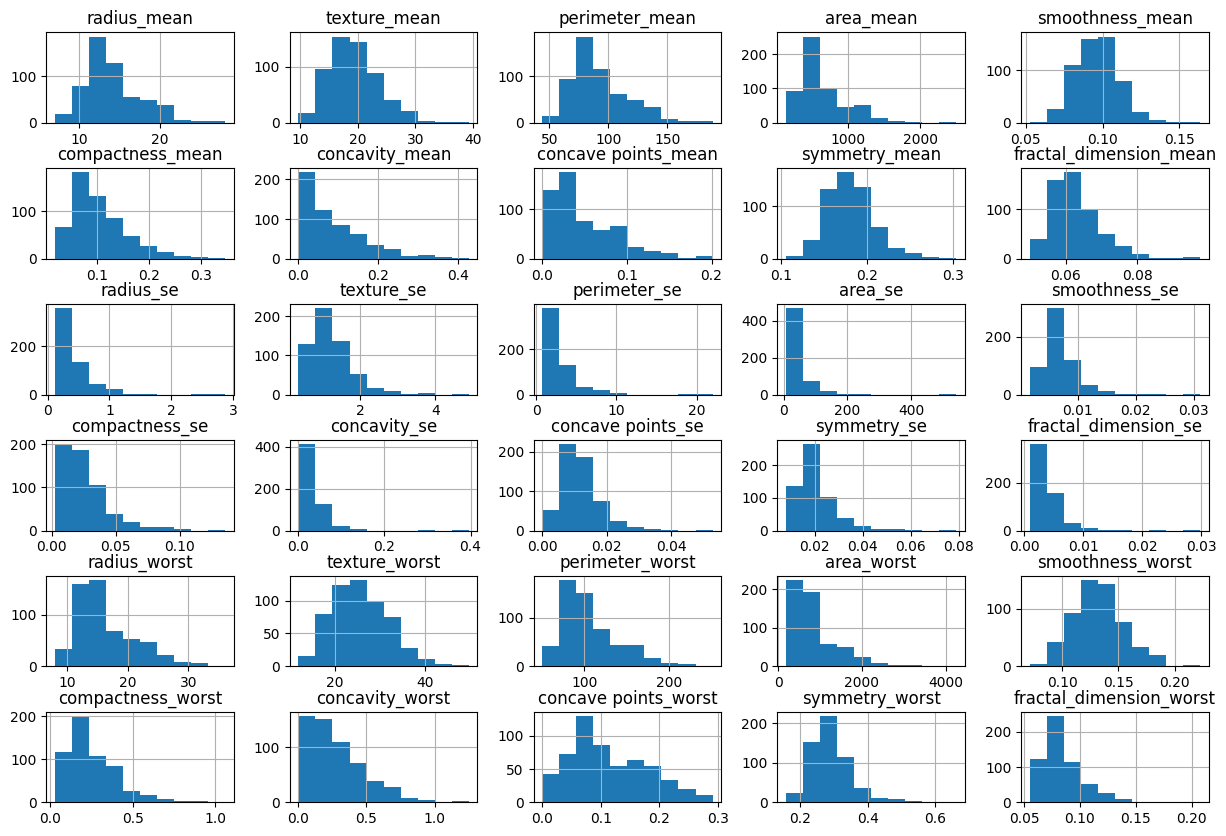

In [ ]:
# Quick histogram of the measurements on the unscaled data
numData = unscaled_data.select_dtypes('float64')

numData.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5);
plt.show()

In [56]:
# Variance of Data
unscaled_data.var()

,0
radius_mean,12.418920
texture_mean,18.498909
perimeter_mean,590.440480
area_mean,123843.554318
smoothness_mean,0.000198
compactness_mean,0.002789
concavity_mean,0.006355
concave points_mean,0.001506
symmetry_mean,0.000752
fractal_dimension_mean,0.000050


In [ ]:
# Perform PCA on the unscaled Data
unscaled_data_PCA = PCA()

unscaled_data_PCA.fit(unscaled_data)

PCA()

In [ ]:
# Plot the PCA components variance explained
%%capture
fig , axes = plt.subplots(1, 2, figsize=(15, 6))
ticks = np.arange(unscaled_data_PCA.n_components_)+1
ax = axes[0]
ax.plot(ticks,
        unscaled_data_PCA.explained_variance_ratio_ ,
        marker='o')
ax.set_xlabel('Principal Component');
ax.set_ylabel('Proportion of Variance Explained')
ax.set_ylim([0,1])
ax.set_xticks(ticks)

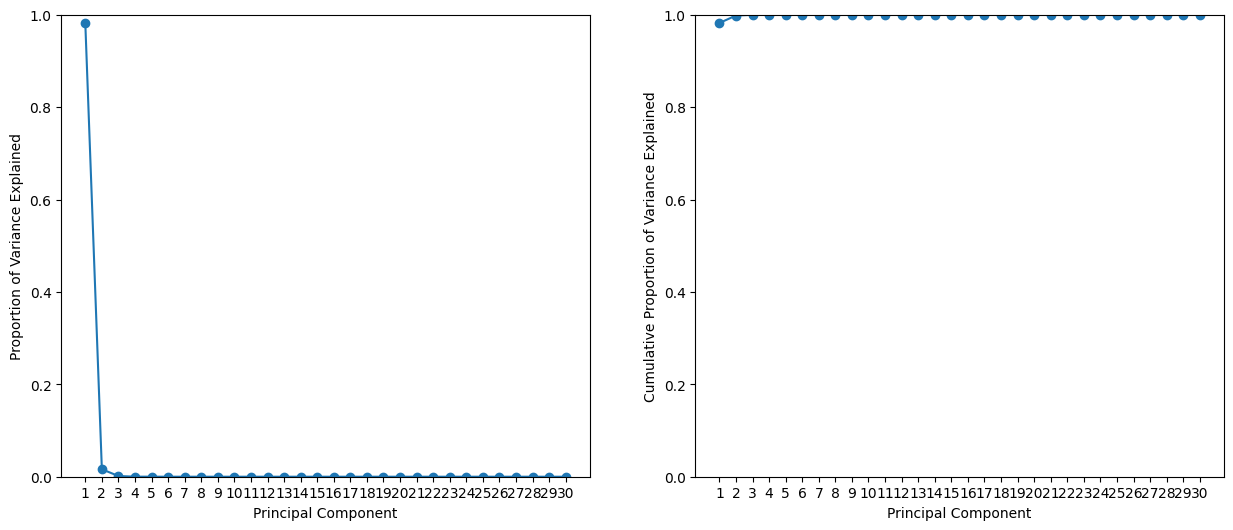

In [ ]:
ax = axes[1]
ax.plot(ticks,
        unscaled_data_PCA.explained_variance_ratio_.cumsum(),
        marker='o')
ax.set_xlabel('Principal Component')
ax.set_ylabel('Cumulative Proportion of Variance Explained')
ax.set_ylim([0, 1])
ax.set_xticks(ticks)
fig

In [ ]:
# Numerical cumsum of the variance explained, starting with PC_1, PC_2, up to PC_5
unscaled_data_PCA.explained_variance_ratio_.cumsum()[:5]

array([0.98204467, 0.99822116, 0.99977867, 0.9998996 , 0.99998788])

If we want the smallest number of PCA retained for at least 75% of the variance in the data, we would use the first PCA. In fact, PC_1 actually explains 98% of the variance as seen in the second plot (right plot) and numerically in my cumsum array.

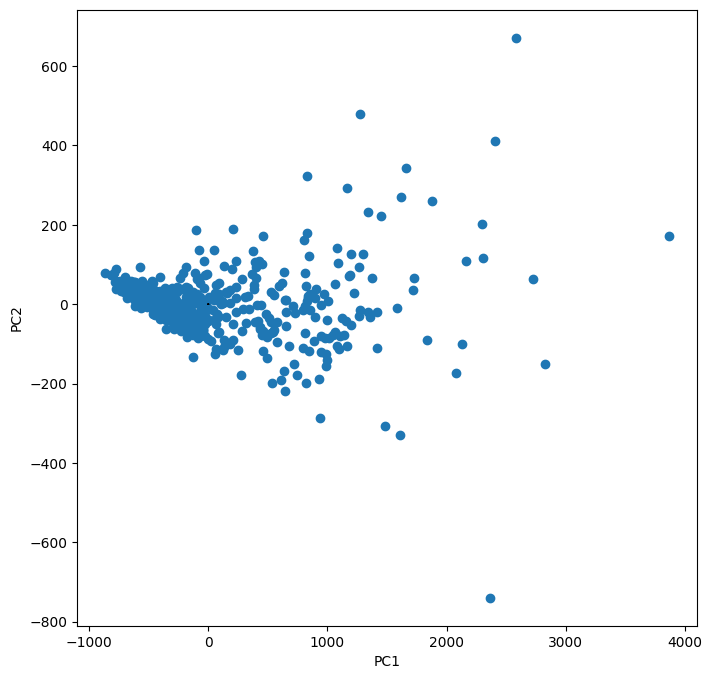

In [83]:
# Biplot of PC1 vs PC2
scores = unscaled_data_PCA.transform(unscaled_data)

i, j = 0, 1 # which components (PC1 and PC2)
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.scatter(scores[:, 0], scores[:,1])
ax.set_xlabel('PC%d' % (i+1))
ax.set_ylabel('PC%d' % (j+1))
for k in range(unscaled_data_PCA.components_.shape[1]):
  ax.arrow(0, 0, unscaled_data_PCA.components_[i, k], unscaled_data_PCA.components_[j, k])

Text(0, 0.5, 'PC2')

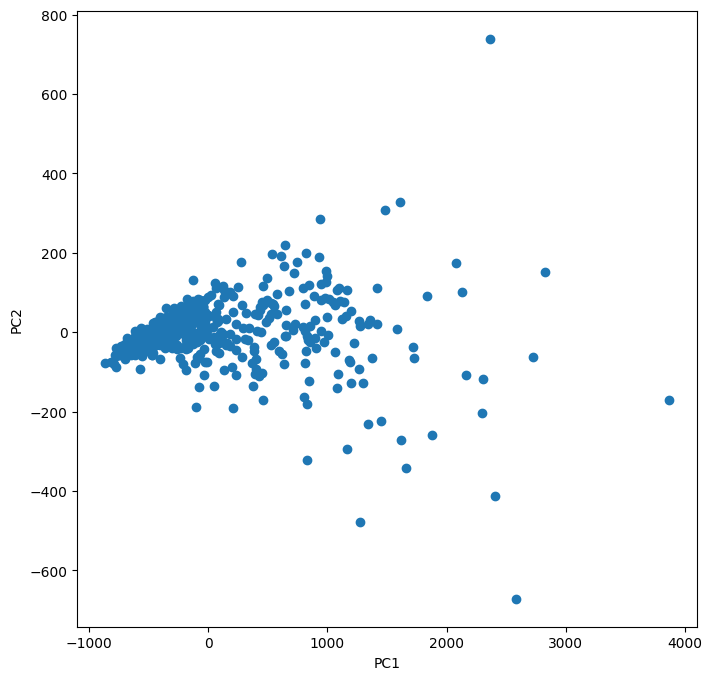

In [84]:
# Flip and plot
scale_arrow = s_ = 2
scores[:,1] *= -1
unscaled_data_PCA.components_[1] *= -1 # flip the y-axis
fig , ax = plt.subplots(1, 1, figsize=(8, 8))
ax.scatter(scores[:,0], scores[:,1])
ax.set_xlabel('PC%d' % (i+1))
ax.set_ylabel('PC%d' % (j+1))

By plotting PCA scores of the first and second components, we can see that PC1 holds essentially all of the variance within the data as seen in just the difference in axis scaling. PC2 goes up to 800, while PC1 expands to 4000.

## (b)

In [58]:
from sklearn.preprocessing import StandardScaler

# Scale data
scaler = StandardScaler(with_std=True,
                        with_mean=True)
scaled_data = scaler.fit_transform(unscaled_data)

In [59]:
# Data is now mean 0 with variance 1
print(scaled_data.mean())
print(scaled_data.var())

-6.826538293184326e-17
1.0


In [60]:
# Perform PCA
scaled_data_PCA = PCA()

scaled_data_PCA.fit(scaled_data)

PCA()

In [61]:
# Plot the PCA components variance explained
%%capture
fig , axes = plt.subplots(1, 2, figsize=(15, 6))
ticks = np.arange(scaled_data_PCA.n_components_)+1
ax = axes[0]
ax.plot(ticks,
        scaled_data_PCA.explained_variance_ratio_ ,
        marker='o')
ax.set_xlabel('Principal Component');
ax.set_ylabel('Proportion of Variance Explained')
ax.set_ylim([0,1])
ax.set_xticks(ticks)

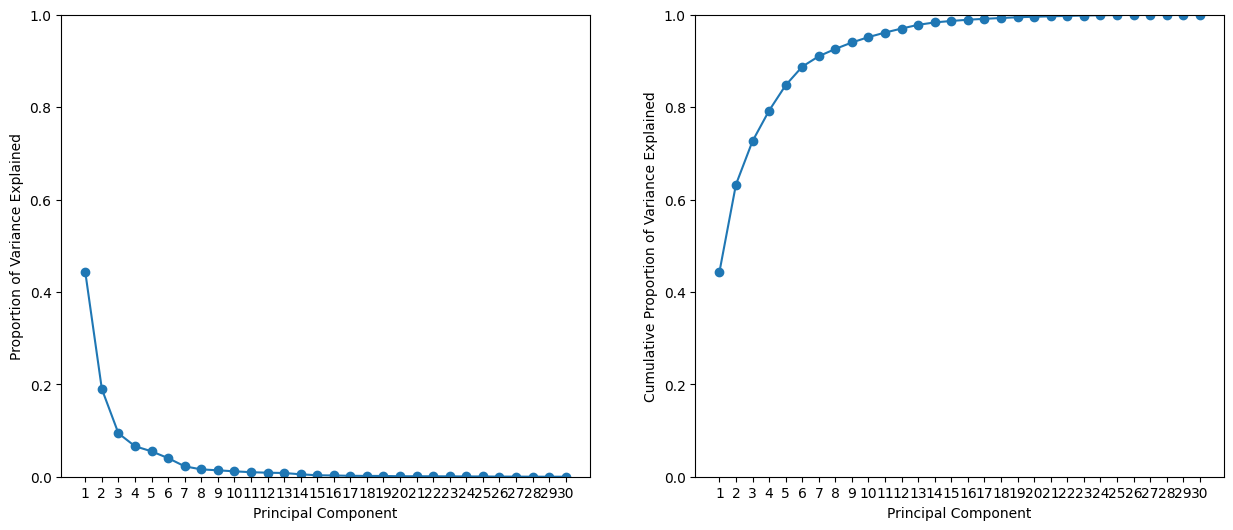

In [62]:
ax = axes[1]
ax.plot(ticks,
        scaled_data_PCA.explained_variance_ratio_.cumsum(),
        marker='o')
ax.set_xlabel('Principal Component')
ax.set_ylabel('Cumulative Proportion of Variance Explained')
ax.set_ylim([0, 1])
ax.set_xticks(ticks)
fig

In [63]:
# Numerical cumsum of the variance explained, starting with PC_1, PC_2, up to PC_5
scaled_data_PCA.explained_variance_ratio_.cumsum()[:5]

array([0.44272026, 0.63243208, 0.72636371, 0.79238506, 0.84734274])

Based on the cumulative sum explained variance ratio for the PCA. You will need 4 PCs to explain at least 75% of the variance in the data. 4 PCs cumsum is 79% of the variance in the data.

## (c)

In [129]:
%%capture
# PCA scores
scores = scaled_data_PCA.transform(scaled_data)

# Plot the PCA comparisons with overlayed diagnosis
fig , axes = plt.subplots(3, 1, figsize=(5, 10))

colors = {'B': 'blue', 'M': 'red'}

# PC1 v PC2
ax = axes[0]
i, j = 0, 1 # which components (PC1 and PC2)
ax.scatter(scores[:, i], scores[:,j])
ax.set_xlabel('PC%d' % (i+1))
ax.set_ylabel('PC%d' % (j+1))

for idx, label in enumerate(rawData.diagnosis):
    ax.scatter(scores[idx, i], scores[idx, j], color=colors[label], label=label)

# PC1 v PC3
ax = axes[1]
i, j = 0, 2 # which components (PC1 and PC3)
ax.scatter(scores[:, i], scores[:,j])
ax.set_xlabel('PC%d' % (i+1))
ax.set_ylabel('PC%d' % (j+1))

for idx, label in enumerate(rawData.diagnosis):
    ax.scatter(scores[idx, i], scores[idx, j], color=colors[label], label=label)

# PC2 v PC3
ax = axes[2]
i, j = 1, 2 # which components (PC2 and PC3)
ax.scatter(scores[:, i], scores[:,j])
ax.set_xlabel('PC%d' % (i+1))
ax.set_ylabel('PC%d' % (j+1))

for idx, label in enumerate(rawData.diagnosis):
    ax.scatter(scores[idx, i], scores[idx, j], color=colors[label], label=label)

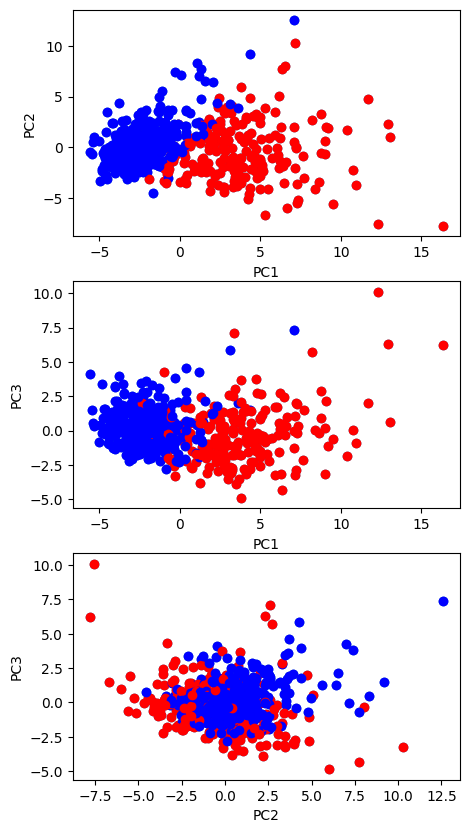

In [130]:
fig

Looking at the 3 combinations of PC, the first two biplots that includes PC1 appears to be predictive of diagnosis. There is a clear separation of blue dots (benign) and red dots (maligant) in both PC1 v PC2 and PC1 v PC3. But PC1 v PC2 looks to be a bit better, since in PC1 v PC3, there are some overlaps of red and blue in the middle. The separation is also mainly on the horizontal axix, which is PC1, that means that PC1 captures a lot of the variance that is predictive of diagnosis.

## (d)

In [134]:
# Scale data
scaler = StandardScaler(with_std=True,
                        with_mean=True)
scaled_data = scaler.fit_transform(unscaled_data)

# Perform PCA (prcomp)
scaled_data_PCA = PCA()
scaled_data_PCA.fit(scaled_data)

# Perform Rotation
scaled_data_PCA_rotated = scaled_data_PCA.components_.T

# Compute PCA scores
scaled_data_PCA_rotated_scores = np.dot(scaled_data, scaled_data_PCA_rotated)

scaled_data_PCA_scores = scaled_data_PCA.transform(scaled_data)

# Check that they have the same scores
np.allclose(scaled_data_PCA_rotated_scores, scaled_data_PCA_scores)

True

# Part II

In [ ]:
!pip install ISLP
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, cut_tree
from ISLP.cluster import compute_linkage

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')
mean:  -6.826538293184326e-17
variance:  1.0


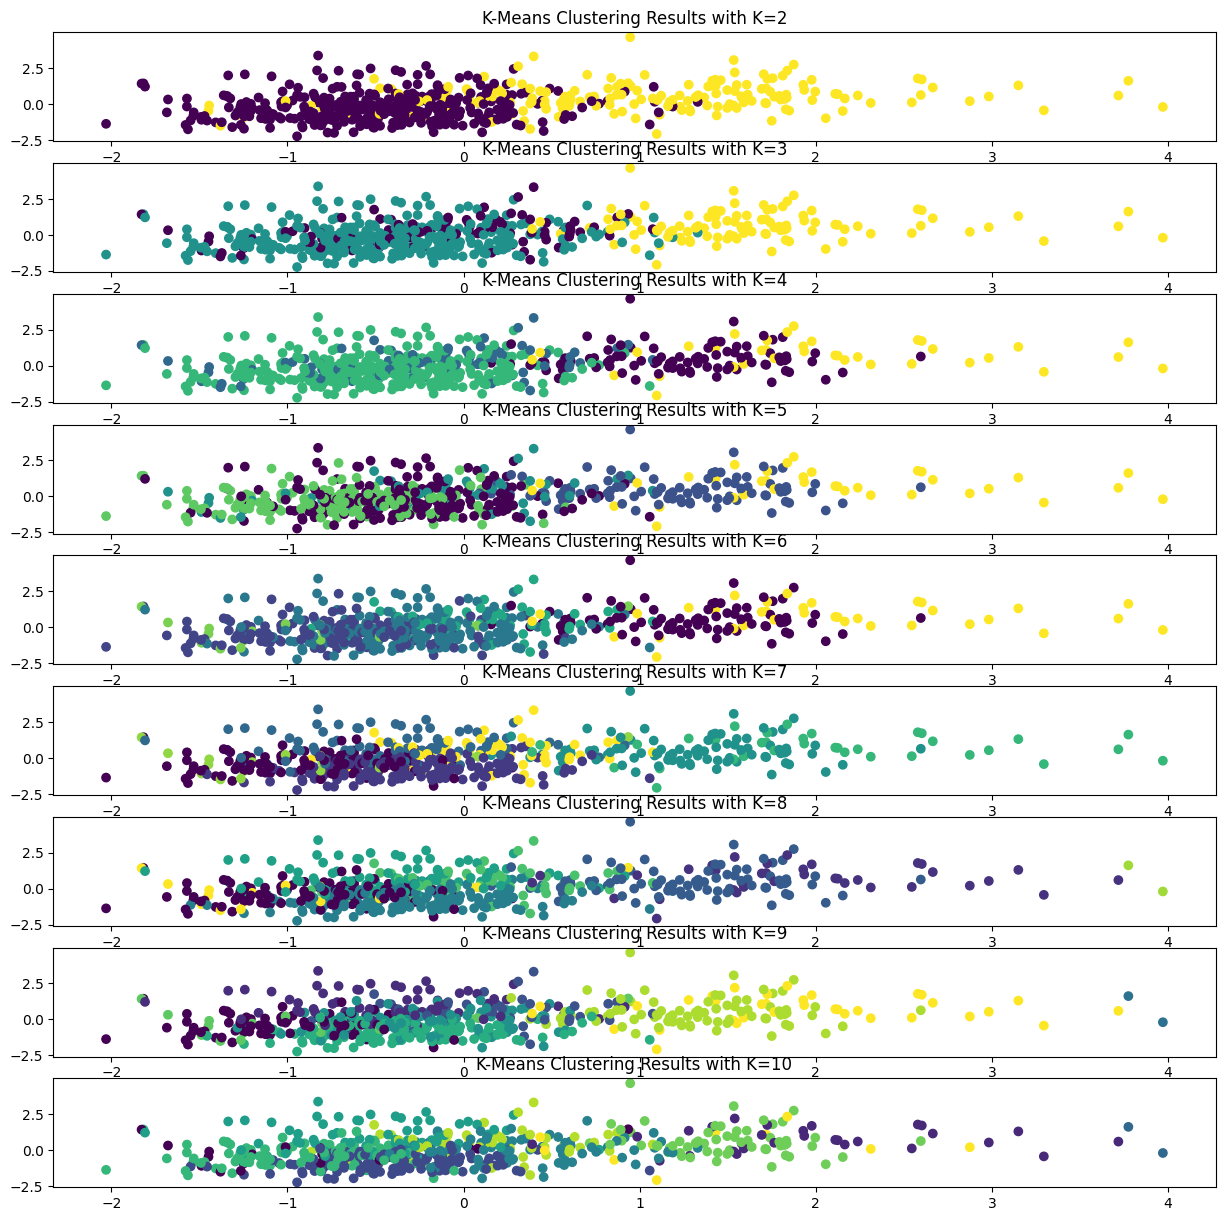

In [152]:
# Confirm that unscaled_data are just the means, se, and worst measurements
print(unscaled_data.columns)

# Scale data
scaler = StandardScaler(with_std=True,
                        with_mean=True)
scaled_data = scaler.fit_transform(unscaled_data)

# Data is now mean 0 with variance 1
print("mean: ", scaled_data.mean())
print("variance: ", scaled_data.var())

# Set parameters
setseed = 1 # set.seed(1)
n_init = 100 # 100 random start

# Set up plotting
fig , axes = plt.subplots(9, 1, figsize=(15, 15))

# Perform KMeans clustering from 2 - 10
within_cluster_sum_squares = []

for k in range(2, 11):
  kmeans = KMeans(n_clusters=k,
                  random_state=setseed,
                  n_init=n_init)
  kmeans.fit(scaled_data)
  within_cluster_sum_squares.append(kmeans.inertia_)

  ax = axes[k-2]
  ax.scatter(scaled_data[:,0], scaled_data[:,1], c=kmeans.labels_)
  ax.set_title("K-Means Clustering Results with K=%d" % k)

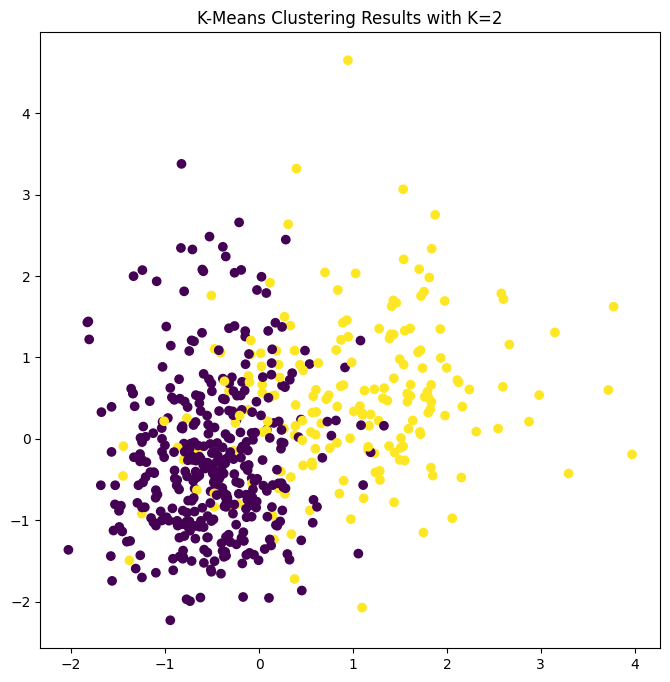

In [142]:
fig